In [31]:
# Load libraries for basic computing 
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.dates as mdates

# Load libraries for regression
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.model_selection import train_test_split

# Load libraries for visualization
import seaborn as sb
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("isedol_total_cleanse.csv")
#print(df)
df.head(5)

,user,index_months,year,month,date,weekday,date_formatting,stream_url,length_minute,watchtime_hrs,avg_viewers,peak_viewers,new_followers,followers_hourly,views,views_hourly,Cattegory,co_stream,event
0,vo_ine,15,2022,3,14,1,3/14/2022,https://sullygnome.com/channel/vo_ine/stream/4...,178,1770032,9944,15773,512,157,70685,21749,Just Chatting,NaN,0
1,vo_ine,15,2022,3,13,7,3/13/2022,https://sullygnome.com/channel/vo_ine/stream/4...,105,1234065,11753,15257,306,153,30565,15282,Just Chatting,NaN,0
2,vo_ine,15,2022,3,12,6,3/12/2022,https://sullygnome.com/channel/vo_ine/stream/4...,354,3208656,9064,12671,627,100,80187,12829,Just Chatting,NaN,0
3,vo_ine,15,2022,3,11,5,3/11/2022,https://sullygnome.com/channel/vo_ine/stream/4...,396,3303432,8342,14061,1123,166,136579,20233,Just Chatting,NaN,1
4,vo_ine,15,2022,3,10,4,3/10/2022,https://sullygnome.com/channel/vo_ine/stream/4...,508,3025140,5955,10314,805,92,109850,12554,Just Chatting,NaN,0


In [3]:
# 날짜 관련 변수
# year
# month
# date
# Index_month : 월별 순서
# date_formatting : 정식규격 날짜(MM/DD/YYYY)
# weekday : 요일

# 기타 등등
# stream_url : 스트리밍 주소
# Cattegory : 방송 카테고리
# co_stream : 합방 여부
# event : 이벤트 여부

# 시청 정보
# length_minute : 분길이
# watchtime_hrs: 분단위
# avg_viewer : 평균 시청자 수
# peak_viewer : 최고점 시청자 수
# new_followers : 새 팔로워
# followers_hourly : 시간당 새 팔로워 수
# views : 시청수
# views_hourly : 시간당 시청수

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 977 entries, 0 to 976
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   user              977 non-null    object 
 1   index_months      977 non-null    int64  
 2   year              977 non-null    int64  
 3   month             977 non-null    int64  
 4   date              977 non-null    int64  
 5   weekday           977 non-null    int64  
 6   date_formatting   977 non-null    object 
 7   stream_url        977 non-null    object 
 8   length_minute     977 non-null    int64  
 9   watchtime_hrs     977 non-null    int64  
 10  avg_viewers       977 non-null    int64  
 11  peak_viewers      977 non-null    int64  
 12  new_followers     977 non-null    int64  
 13  followers_hourly  977 non-null    int64  
 14  views             977 non-null    int64  
 15  views_hourly      977 non-null    int64  
 16  Cattegory         977 non-null    object 
 1

In [4]:
df.describe()
df.describe(include=['O'])

,user,date_formatting,stream_url,Cattegory
count,977,977,977,977
unique,7,189,977,20
top,woowakgood,12/17/2021,https://sullygnome.com/channel/woowakgood/stre...,Just Chatting
freq,174,13,1,909


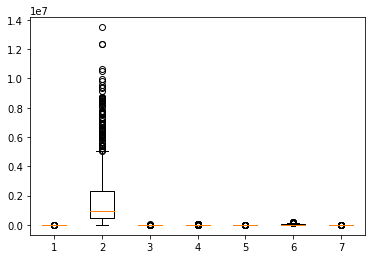

In [5]:
#plt.boxplot(df.views)
#plt.boxplot(df.avg_viewers)

plt.boxplot([df.length_minute, df.watchtime_hrs, df.avg_viewers, df.peak_viewers, df.new_followers, df.views, df.views_hourly])
plt.show()

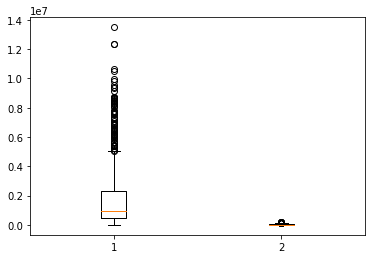

In [6]:
plt.boxplot([df.watchtime_hrs, df.views])
plt.show()

<AxesSubplot:>

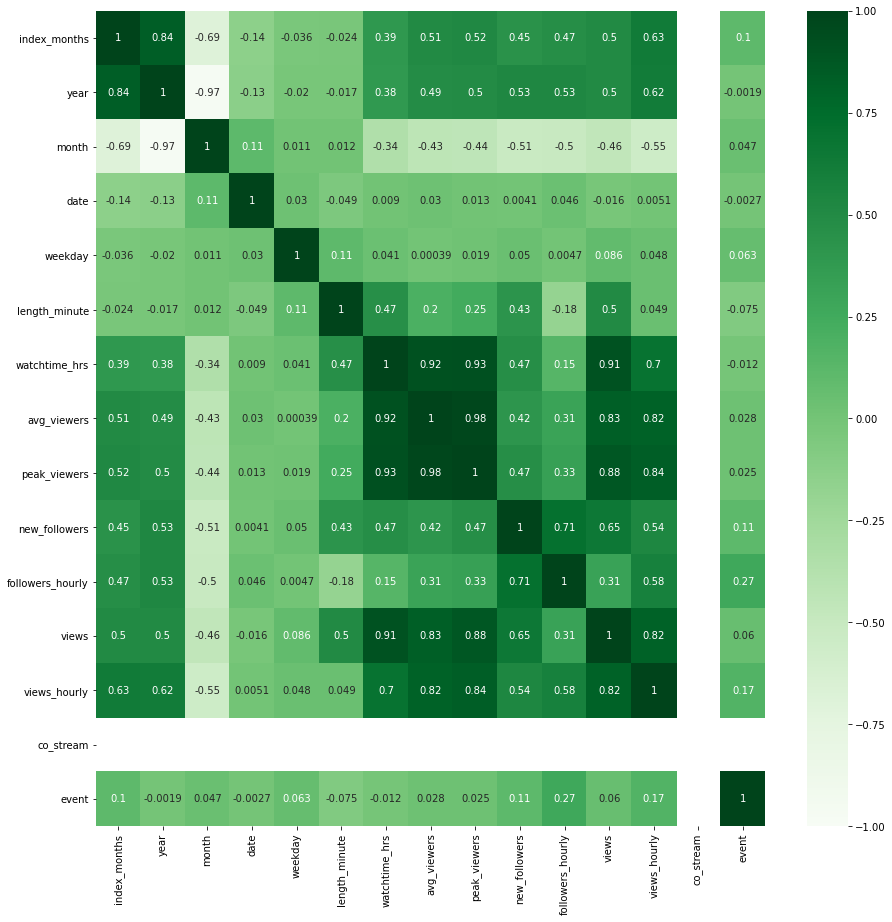

In [7]:
plt.rcParams["figure.figsize"] = (15,15)
sb.heatmap(df.corr(),
           annot = True, #실제 값 화면에 나타내기
           cmap = 'Greens', #색상
           vmin = -1, vmax=1 , #컬러차트 영역 -1 ~ +1
          )

In [8]:
# 개별 User의 필터링 조건(ex. Ine)
is_ine = df['user'] == 'vo_ine'
ine = df[is_ine]

is_lilpa = df['user'] == 'lilpa'
lilpa = df[is_lilpa]

is_vii = df['user'] == 'viichan'
viichan = df[is_vii]

is_jing = df['user'] == 'jingburger'
jingburger = df[is_jing]

is_gsg = df['user'] == 'gosegu'
gosegu = df[is_gsg]

is_jrr = df['user'] == 'jururu'
jururu = df[is_jrr]

is_woo = df['user'] == 'woowakgood'
woowakgood = df[is_woo]

Text(0.5, 1.0, 'Watchtime_hrs tendency - vo_ine')

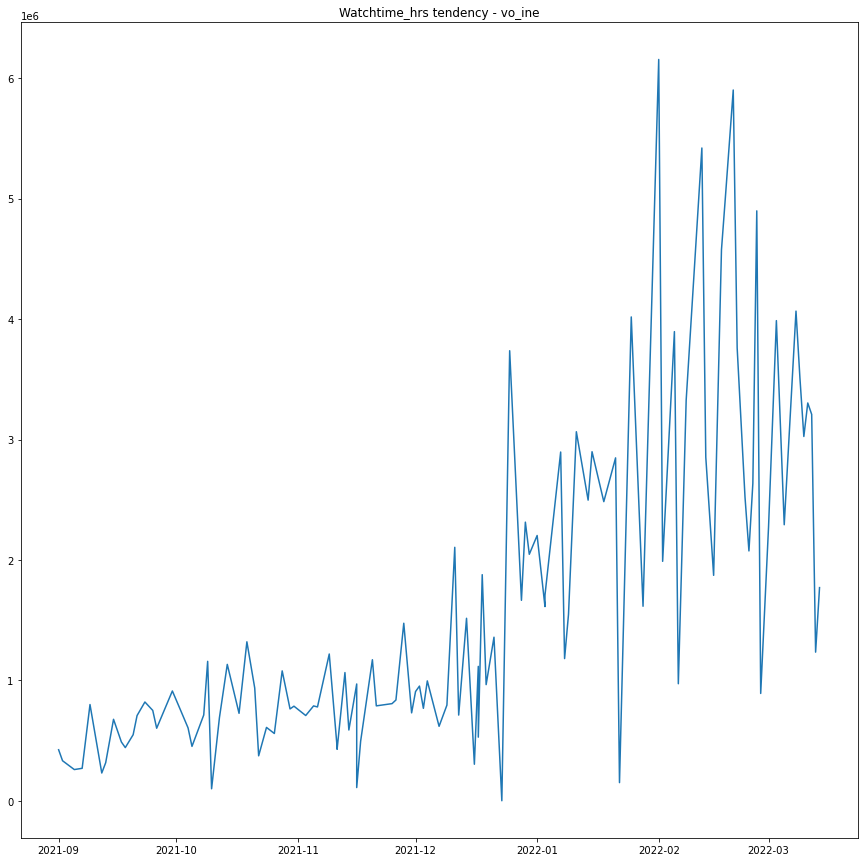

In [9]:
# pyplot 예시 (시간대별 분석) 그래프 예시
plt.plot(pd.to_datetime(df[is_ine]['date_formatting']), df[is_ine].watchtime_hrs)
plt.title('Watchtime_hrs tendency - vo_ine')

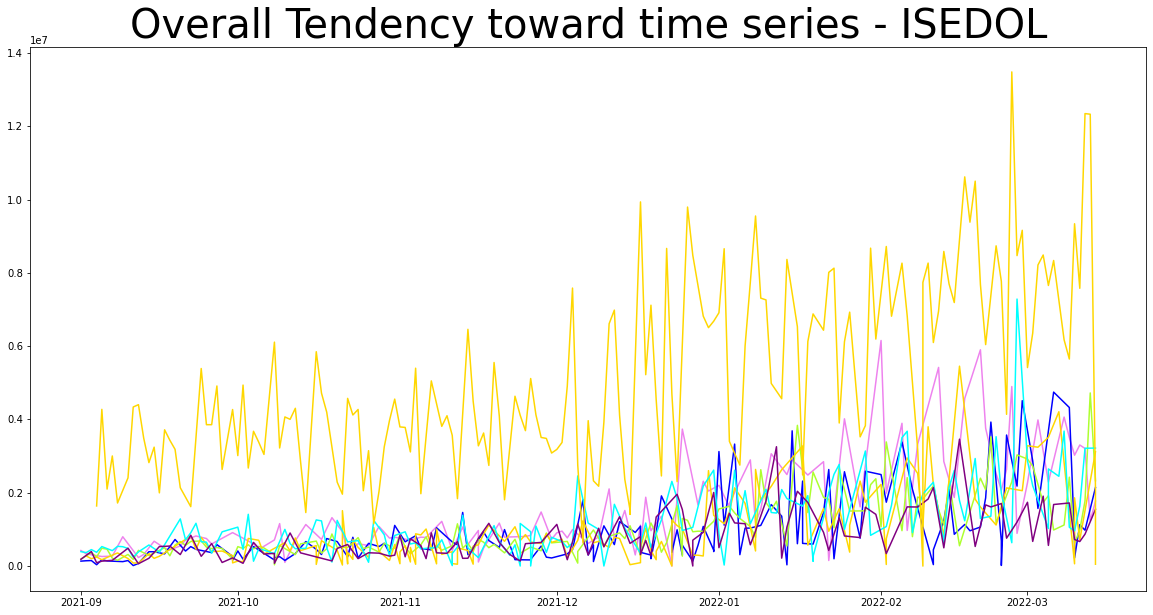

In [10]:
plt.figure(figsize=(20,10))
plt.title('Overall Tendency toward time series - ISEDOL',fontsize=40)
plt.plot(pd.to_datetime(df[is_ine]['date_formatting']), df[is_ine].watchtime_hrs, color="violet")
plt.plot(pd.to_datetime(df[is_lilpa]['date_formatting']), df[is_lilpa].watchtime_hrs, color="blue")
plt.plot(pd.to_datetime(df[is_vii]['date_formatting']), df[is_vii].watchtime_hrs, color="greenyellow")
plt.plot(pd.to_datetime(df[is_jing]['date_formatting']), df[is_jing].watchtime_hrs, color="gold")
plt.plot(pd.to_datetime(df[is_gsg]['date_formatting']), df[is_gsg].watchtime_hrs, color="cyan")
plt.plot(pd.to_datetime(df[is_jrr]['date_formatting']), df[is_jrr].watchtime_hrs, color="purple")
plt.plot(pd.to_datetime(df[is_woo]['date_formatting']), df[is_woo].watchtime_hrs, color="gold")

Text(0.5, 1.0, 'Woowakgood')

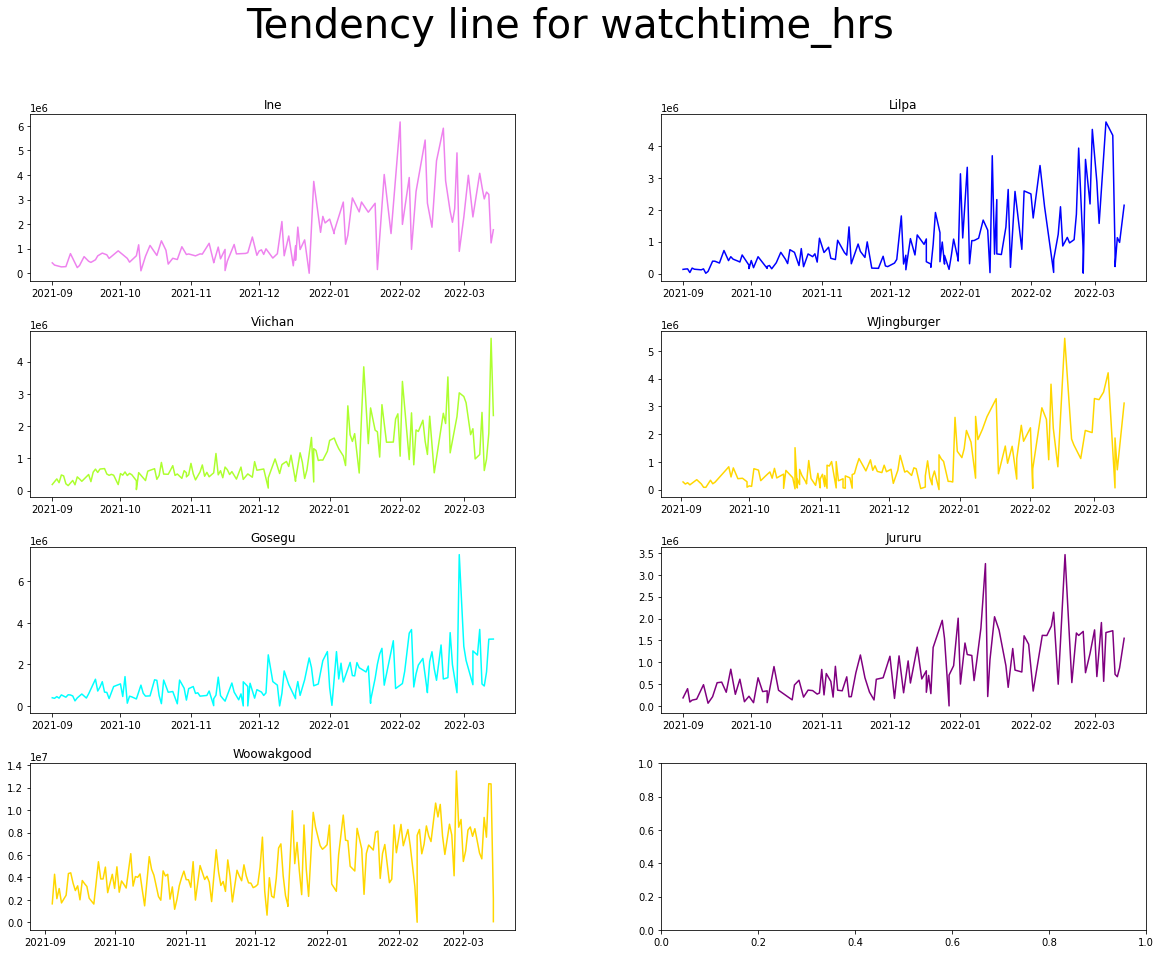

In [11]:
# 개별비교분석 그래프
f, axes = plt.subplots(4, 2)
f.set_size_inches((20, 15))
plt.subplots_adjust(wspace = 0.3, hspace = 0.3)
plt.suptitle('Tendency line for watchtime_hrs',fontsize=40)

axes[0, 0].plot(pd.to_datetime(df[is_ine]['date_formatting']), df[is_ine].watchtime_hrs, color="violet")
axes[0, 0].set_title("Ine")

axes[0, 1].plot(pd.to_datetime(df[is_lilpa]['date_formatting']), df[is_lilpa].watchtime_hrs, color="blue")
axes[0, 1].set_title('Lilpa')

axes[1, 0].plot(pd.to_datetime(df[is_vii]['date_formatting']), df[is_vii].watchtime_hrs, color="greenyellow")
axes[1, 0].set_title('Viichan')

axes[1, 1].plot(pd.to_datetime(df[is_jing]['date_formatting']), df[is_jing].watchtime_hrs, color="gold")
axes[1, 1].set_title('WJingburger')

axes[2, 0].plot(pd.to_datetime(df[is_gsg]['date_formatting']), df[is_gsg].watchtime_hrs, color="cyan")
axes[2, 0].set_title('Gosegu')

axes[2, 1].plot(pd.to_datetime(df[is_jrr]['date_formatting']), df[is_jrr].watchtime_hrs, color="purple")
axes[2, 1].set_title('Jururu')

axes[3, 0].plot(pd.to_datetime(df[is_woo]['date_formatting']), df[is_woo].watchtime_hrs, color="gold")
axes[3, 0].set_title('Woowakgood')

<AxesSubplot:xlabel='user'>

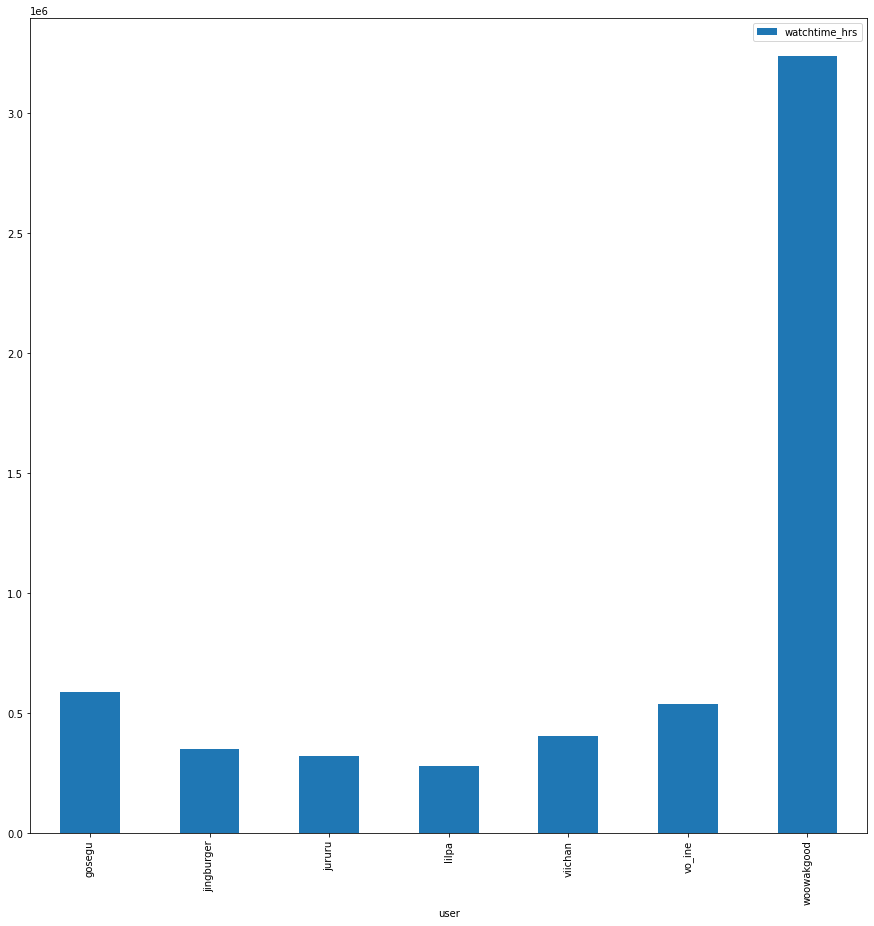

In [12]:
#df[df['country'] == '한국']
df_bf = df[df['index_months'] == 9]
df_bf[['user', 'watchtime_hrs']].groupby(['user'], as_index=True).mean().plot.bar()

<AxesSubplot:xlabel='user'>

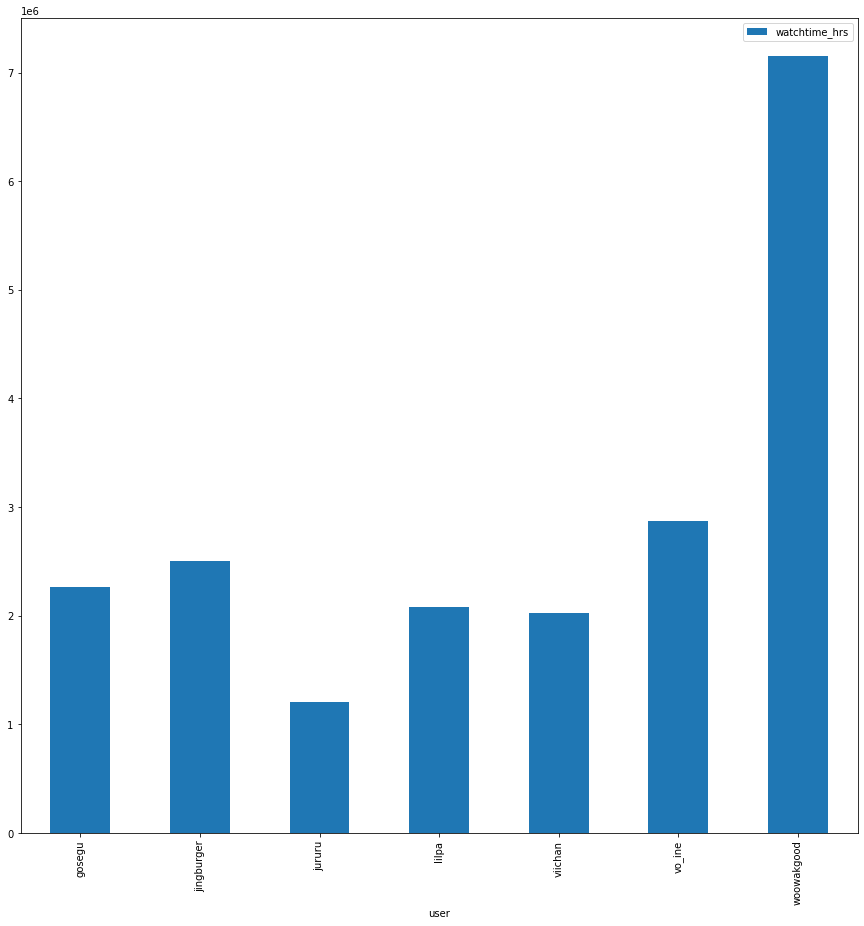

In [13]:
df_af = df[df['index_months'] == 15]
df_af[['user', 'watchtime_hrs']].groupby(['user'], as_index=True).mean().plot.bar()

In [14]:
df_bf[df['user'] == 'gosegu']

<ipython-input-14-62423541cd40>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_bf[df['user'] == 'gosegu']


,user,index_months,year,month,date,weekday,date_formatting,stream_url,length_minute,watchtime_hrs,avg_viewers,peak_viewers,new_followers,followers_hourly,views,views_hourly,Cattegory,co_stream,event
670,gosegu,9,2021,9,28,2,9/28/2021,https://sullygnome.com/channel/gosegugosegu/st...,329,933044,2836,3989,403,73,20564,3738,Just Chatting,NaN,0
671,gosegu,9,2021,9,26,7,9/26/2021,https://sullygnome.com/channel/gosegugosegu/st...,184,352912,1918,2347,213,65,10433,3210,Just Chatting,NaN,0
672,gosegu,9,2021,9,25,6,9/25/2021,https://sullygnome.com/channel/gosegugosegu/st...,400,650800,1627,2071,370,54,20665,3061,Just Chatting,NaN,0
673,gosegu,9,2021,9,24,5,9/24/2021,https://sullygnome.com/channel/gosegugosegu/st...,452,663988,1469,1951,408,52,21417,2763,Just Chatting,NaN,0
674,gosegu,9,2021,9,23,4,9/23/2021,https://sullygnome.com/channel/gosegugosegu/st...,446,1166290,2615,3746,488,67,20408,2814,Just Chatting,NaN,0
675,gosegu,9,2021,9,22,3,9/22/2021,https://sullygnome.com/channel/gosegugosegu/st...,489,907095,1855,3674,711,86,30606,3709,Just Chatting,NaN,0
676,gosegu,9,2021,9,21,2,9/21/2021,https://sullygnome.com/channel/gosegugosegu/st...,285,717060,2516,3899,358,75,11675,2457,Just Chatting,NaN,0
677,gosegu,9,2021,9,20,1,9/20/2021,https://sullygnome.com/channel/gosegugosegu/st...,754,1285570,1705,4330,1132,88,36533,2865,Just Chatting,NaN,0
678,gosegu,9,2021,9,17,5,9/17/2021,https://sullygnome.com/channel/gosegugosegu/st...,464,580928,1252,2057,340,43,16571,2138,Just Chatting,NaN,0
679,gosegu,9,2021,9,16,4,9/16/2021,https://sullygnome.com/channel/gosegugosegu/st...,274,379216,1384,1883,248,52,9496,1999,Just Chatting,NaN,0


In [15]:
resultset = np.array([[sum(df_bf[df['user'] == 'gosegu'].watchtime_hrs),
                      sum(df_bf[df['user'] == 'jingburger'].watchtime_hrs),
                      sum(df_bf[df['user'] == 'jururu'].watchtime_hrs),
                      sum(df_bf[df['user'] == 'lilpa'].watchtime_hrs),
                      sum(df_bf[df['user'] == 'viichan'].watchtime_hrs),
                      sum(df_bf[df['user'] == 'vo_ine'].watchtime_hrs),
                      sum(df_bf[df['user'] == 'woowakgood'].watchtime_hrs)],
                     [sum(df_af[df['user'] == 'gosegu'].watchtime_hrs),
                      sum(df_af[df['user'] == 'jingburger'].watchtime_hrs),
                      sum(df_af[df['user'] == 'jururu'].watchtime_hrs),
                      sum(df_af[df['user'] == 'lilpa'].watchtime_hrs),
                      sum(df_af[df['user'] == 'viichan'].watchtime_hrs),
                      sum(df_af[df['user'] == 'vo_ine'].watchtime_hrs),
                      sum(df_af[df['user'] == 'woowakgood'].watchtime_hrs)]])

resultset


<ipython-input-15-bf20b60bfe89>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  resultset = np.array([[sum(df_bf[df['user'] == 'gosegu'].watchtime_hrs),
<ipython-input-15-bf20b60bfe89>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sum(df_bf[df['user'] == 'jingburger'].watchtime_hrs),
<ipython-input-15-bf20b60bfe89>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sum(df_bf[df['user'] == 'jururu'].watchtime_hrs),
<ipython-input-15-bf20b60bfe89>:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sum(df_bf[df['user'] == 'lilpa'].watchtime_hrs),
<ipython-input-15-bf20b60bfe89>:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sum(df_bf[df['user'] == 'viichan'].watchtime_hrs),
<ipython-input-15-bf20b60bfe89>:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sum(df_bf[df['user'] == 'vo_ine'].watchtime_h

array([[ 12912137,   6975678,   5132579,   6114299,  10137617,   8573704,
         74479531],
       [ 24952280,  20005260,  12088393,  18696910,  24265800,  28672685,
        100082792]])

<BarContainer object of 7 artists>

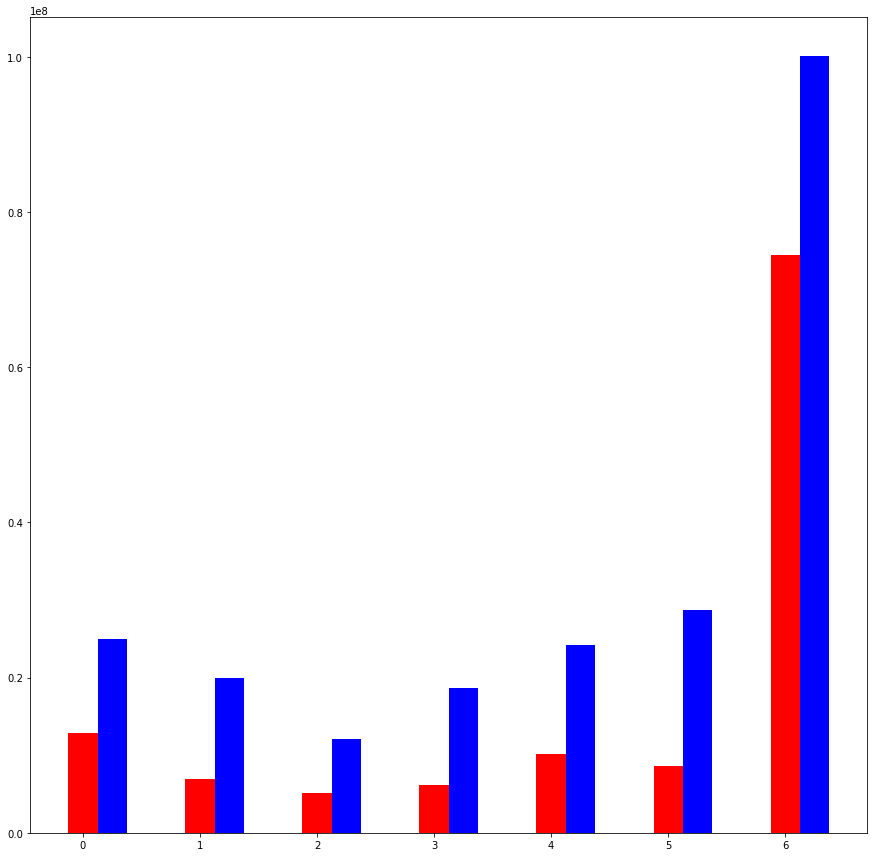

In [16]:
X = np.arange(7)

plt.bar(X + 0.00, resultset[0], color='r', width=0.25)
plt.bar(X + 0.25, resultset[1], color='b', width=0.25)

Text(0.5, 1.0, 'after')

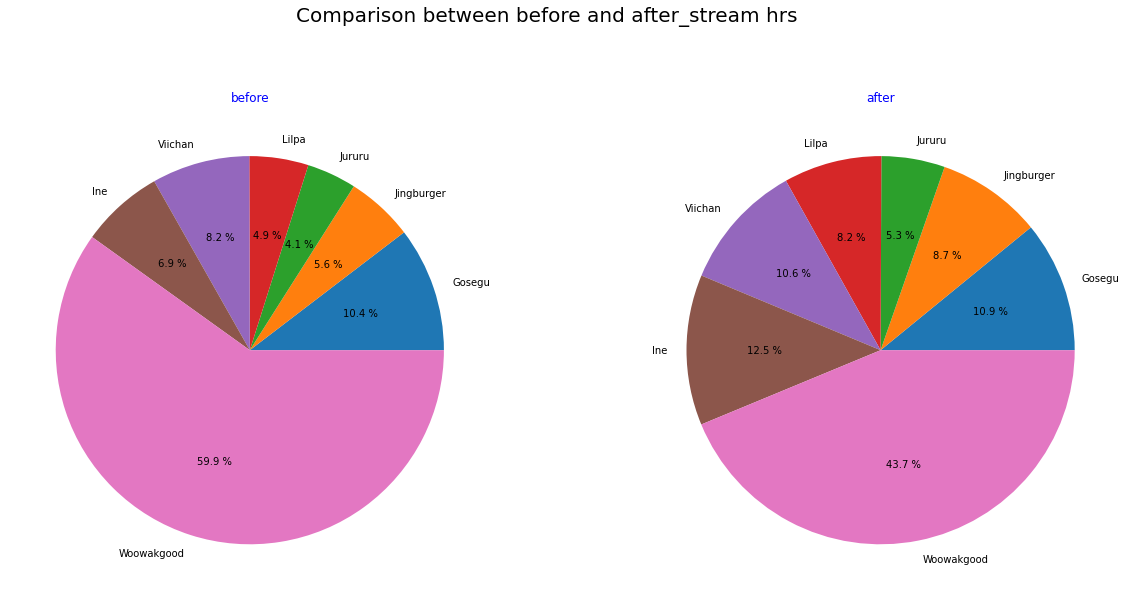

In [17]:
f, axes = plt.subplots(1, 2)
f.set_size_inches((20, 10))
plt.subplots_adjust(wspace = 0.3, hspace = 0.3)
plt.suptitle('Comparison between before and after_stream hrs',fontsize=20)

langs = ['Gosegu', 'Jingburger', 'Jururu', 'Lilpa', 'Viichan', 'Ine', 'Woowakgood']

#plt.pie(resultset[1,], autopct='%.1f %%', labels = langs)

# using subplot function and creating plot one
# row 1, column 2, count 1 subplot

plt.subplot(1, 2, 1)  
plt.pie(resultset[0], autopct='%.1f %%', labels = langs)
plt.title('before',color='b')

# using subplot function and creating plot two
# row 1, column 2, count 2

plt.subplot(1, 2, 2)
plt.pie(resultset[1], autopct='%.1f %%', labels = langs)
plt.title('after', color='b')


# Hold for ARIMA/Time Series Analysis

In [18]:
# Basic Sets
# x = df[['user', 'length_minute', 'watchtime', 'avg_viewers', 'peak_viewers', 'new_followers', 'followers_hourly', 'views', 'views_hourly', 'event']]
# y = df[['']]

# Preprecessing for each user
df_g = df[df['user'] == 'gosegu']

x = df_g[['length_minute', 'watchtime_hrs', 'avg_viewers', 'peak_viewers', 'new_followers', 'followers_hourly', 'event']]
y = df_g[['views']]
# Y = watchtime

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, test_size=0.2)

In [19]:
mlr = LinearRegression()
mlr.fit(x_train, y_train)

LinearRegression()

In [20]:
#my_predict = mlr.predict(my_apartment)

# Simple Time Series Analysis

In [21]:
df_g_test = [df[df['user'] == 'gosegu'].date_formatting, df[df['user'] == 'gosegu'].watchtime_hrs]
df_g_test
df[df['user'] == 'gosegu'].date_formatting

547    3/14/2022
548    3/12/2022
549    3/11/2022
550    3/10/2022
551     3/9/2022
         ...    
687     9/5/2021
688     9/4/2021
689     9/3/2021
690     9/2/2021
691     9/1/2021
Name: date_formatting, Length: 145, dtype: object

In [22]:
df_g = df[df['user'] == 'gosegu']
df_g_test2 = df_g[['date_formatting', 'watchtime_hrs']]
df_g_test2

,date_formatting,watchtime_hrs
547,3/14/2022,3219768
548,3/12/2022,3214538
549,3/11/2022,1636796
550,3/10/2022,958132
551,3/9/2022,1057224
...,...,...
687,9/5/2021,530370
688,9/4/2021,373863
689,9/3/2021,447920
690,9/2/2021,365676


<ipython-input-23-7b05470aee99>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_g_test2['date_formatting'] = pd.to_datetime(df_g_test2['date_formatting'])


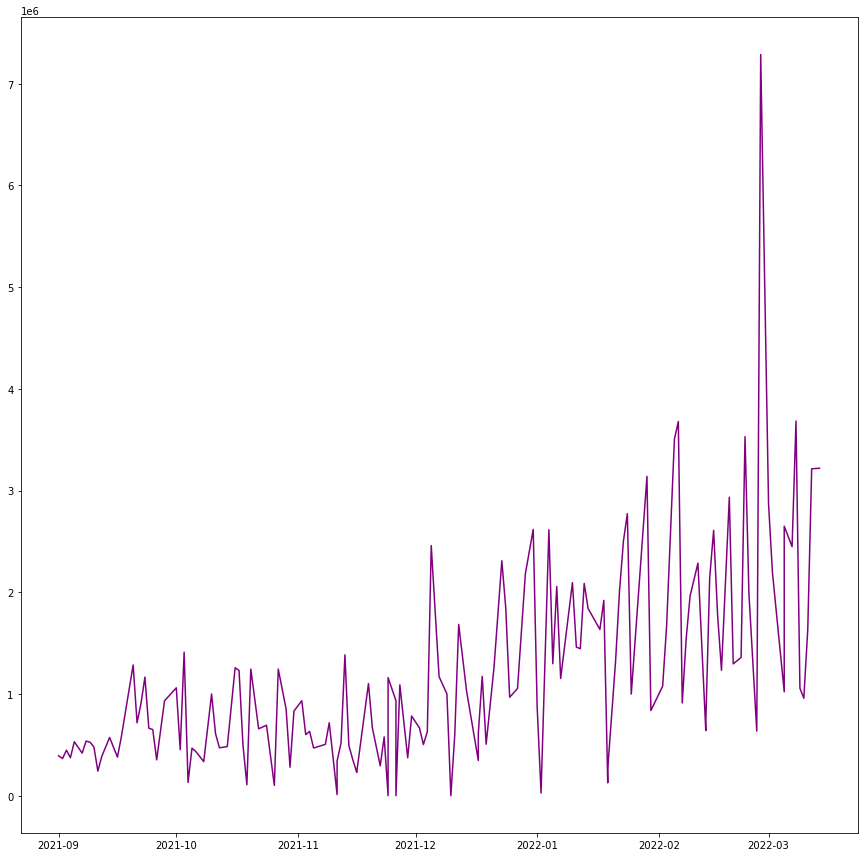

In [23]:
df_g_test2['date_formatting'] = pd.to_datetime(df_g_test2['date_formatting'])
df_g_test2.index = df_g_test2['date_formatting']
df_g_test2
plt.plot(df_g_test2['date_formatting'], df_g_test2.watchtime_hrs, color="purple")

In [24]:
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm

model = ARIMA(df_g_test2.watchtime_hrs.values, order=(2,1,2))
model_fit = model.fit(trend='c', full_output=True, disp=True)
print(model_fit.summary())

C:\Users\USER\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                  144
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -2160.694
Method:                       css-mle   S.D. of innovations         788333.735
Date:                Sun, 07 Aug 2022   AIC                           4333.387
Time:                        15:24:25   BIC                           4351.206
Sample:                             1   HQIC                          4340.628
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.371e+04   4978.911     -2.754      0.006   -2.35e+04   -3954.206
ar.L1.D.y      0.2672      0.284      0.940      0.347      -0.290       0.824
ar.L2.D.y     -0.2199      0.088     -2.510      0.0

C:\Users\USER\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


## Multiple Linear Regression

In [43]:
# Basic Multiple Linear Regression

df['co_stream'].fillna(0, inplace=True)
x = df[['length_minute','event', 'co_stream']]
y = df['watchtime_hrs']


# with sklearn
regr = linear_model.LinearRegression()
regr.fit(x, y)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

x = sm.add_constant(x) # adding a constant
 
model = sm.OLS(y, x).fit()
predictions = model.predict(x) 
 
print_model = model.summary()
print(print_model)


Intercept: 
 -415992.9645163333
Coefficients: 
 [   5785.61516446  306003.86868344 -591967.40938172]
                            OLS Regression Results                            
Dep. Variable:          watchtime_hrs   R-squared:                       0.225
Model:                            OLS   Adj. R-squared:                  0.223
Method:                 Least Squares   F-statistic:                     94.24
Date:                Sun, 07 Aug 2022   Prob (F-statistic):           1.52e-53
Time:                        16:00:28   Log-Likelihood:                -15477.
No. Observations:                 977   AIC:                         3.096e+04
Df Residuals:                     973   BIC:                         3.098e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------